In [ ]:
# 1. Business Problem

In [ ]:
#The business objective of this project is to predict the likelihood of heart disease in patients based on 
#various health metrics like age, cholesterol levels, blood pressure, and others. 
#By building a predictive model, we aim to help healthcare providers 
#identify patients at risk of heart disease, enabling early intervention and better health outcomes.

In [1]:
# 1.2  constraints?
#Data constraints: Missing values, incorrect entries, or outliers.
#Model constraints: The model should be interpretable and scalable for real-time prediction. 

In [2]:
#1.3 Data Dictionary 

#Nominal (Categorical) Data:sex,fbs,exang,target

#Quantitative (Continuous or Discrete) Data:age,chol,trestbps,thalacholdpeak etc


In [16]:
# Importing essential libraries for data manipulation, visualization, scaling, dimensionality reduction, clustering, and evaluation
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays
import matplotlib.pyplot as plt  # For data visualization and plotting
import seaborn as sns  # For advanced data visualization and aesthetic plots

In [17]:
data = pd.read_csv('heart disease.csv')  
print(data.head())  # Display the first few rows of the dataset


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# 2.1 Data Preprocessing

In [18]:

# Check for null values

print(data.isnull().sum())#If the count for any column is greater than 0, that column contains missing values
#t Hence,here are no missing values in the dataset


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [42]:
data.drop_duplicates(inplace=True)

In [21]:
# Step 2.2: Scaling the dataset (excluding the target 'target')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('target', axis=1))

# Step 4: Exploratory Data Analysis (EDA)


In [23]:
# 4.1 Summary statistics of the dataset



print(data.describe())

#The dataset has varying values for features like age and cholesterol,
#while some features like sex and fbs are mostly binary means either 0 or 1.

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

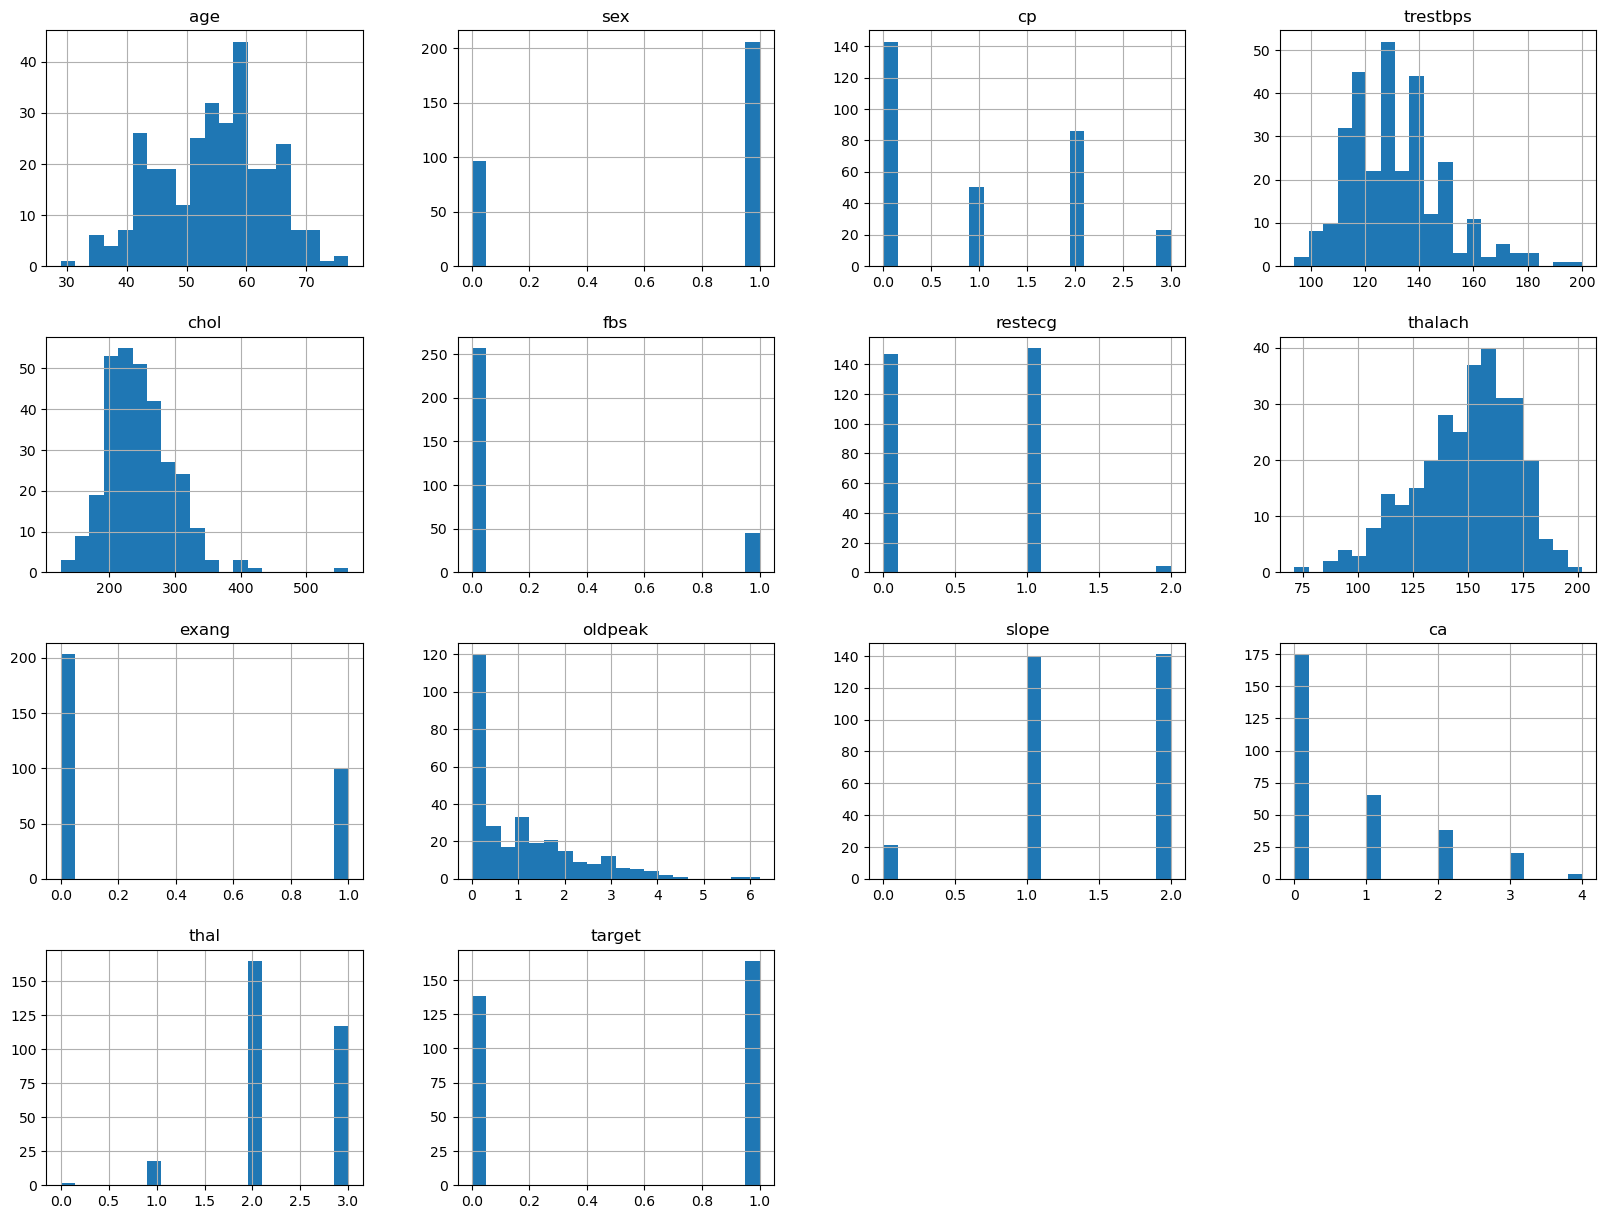

In [26]:
# Univariate Analysis means plotting histogram for each features.
data.hist(bins=20, figsize=(20, 15))
plt.show()


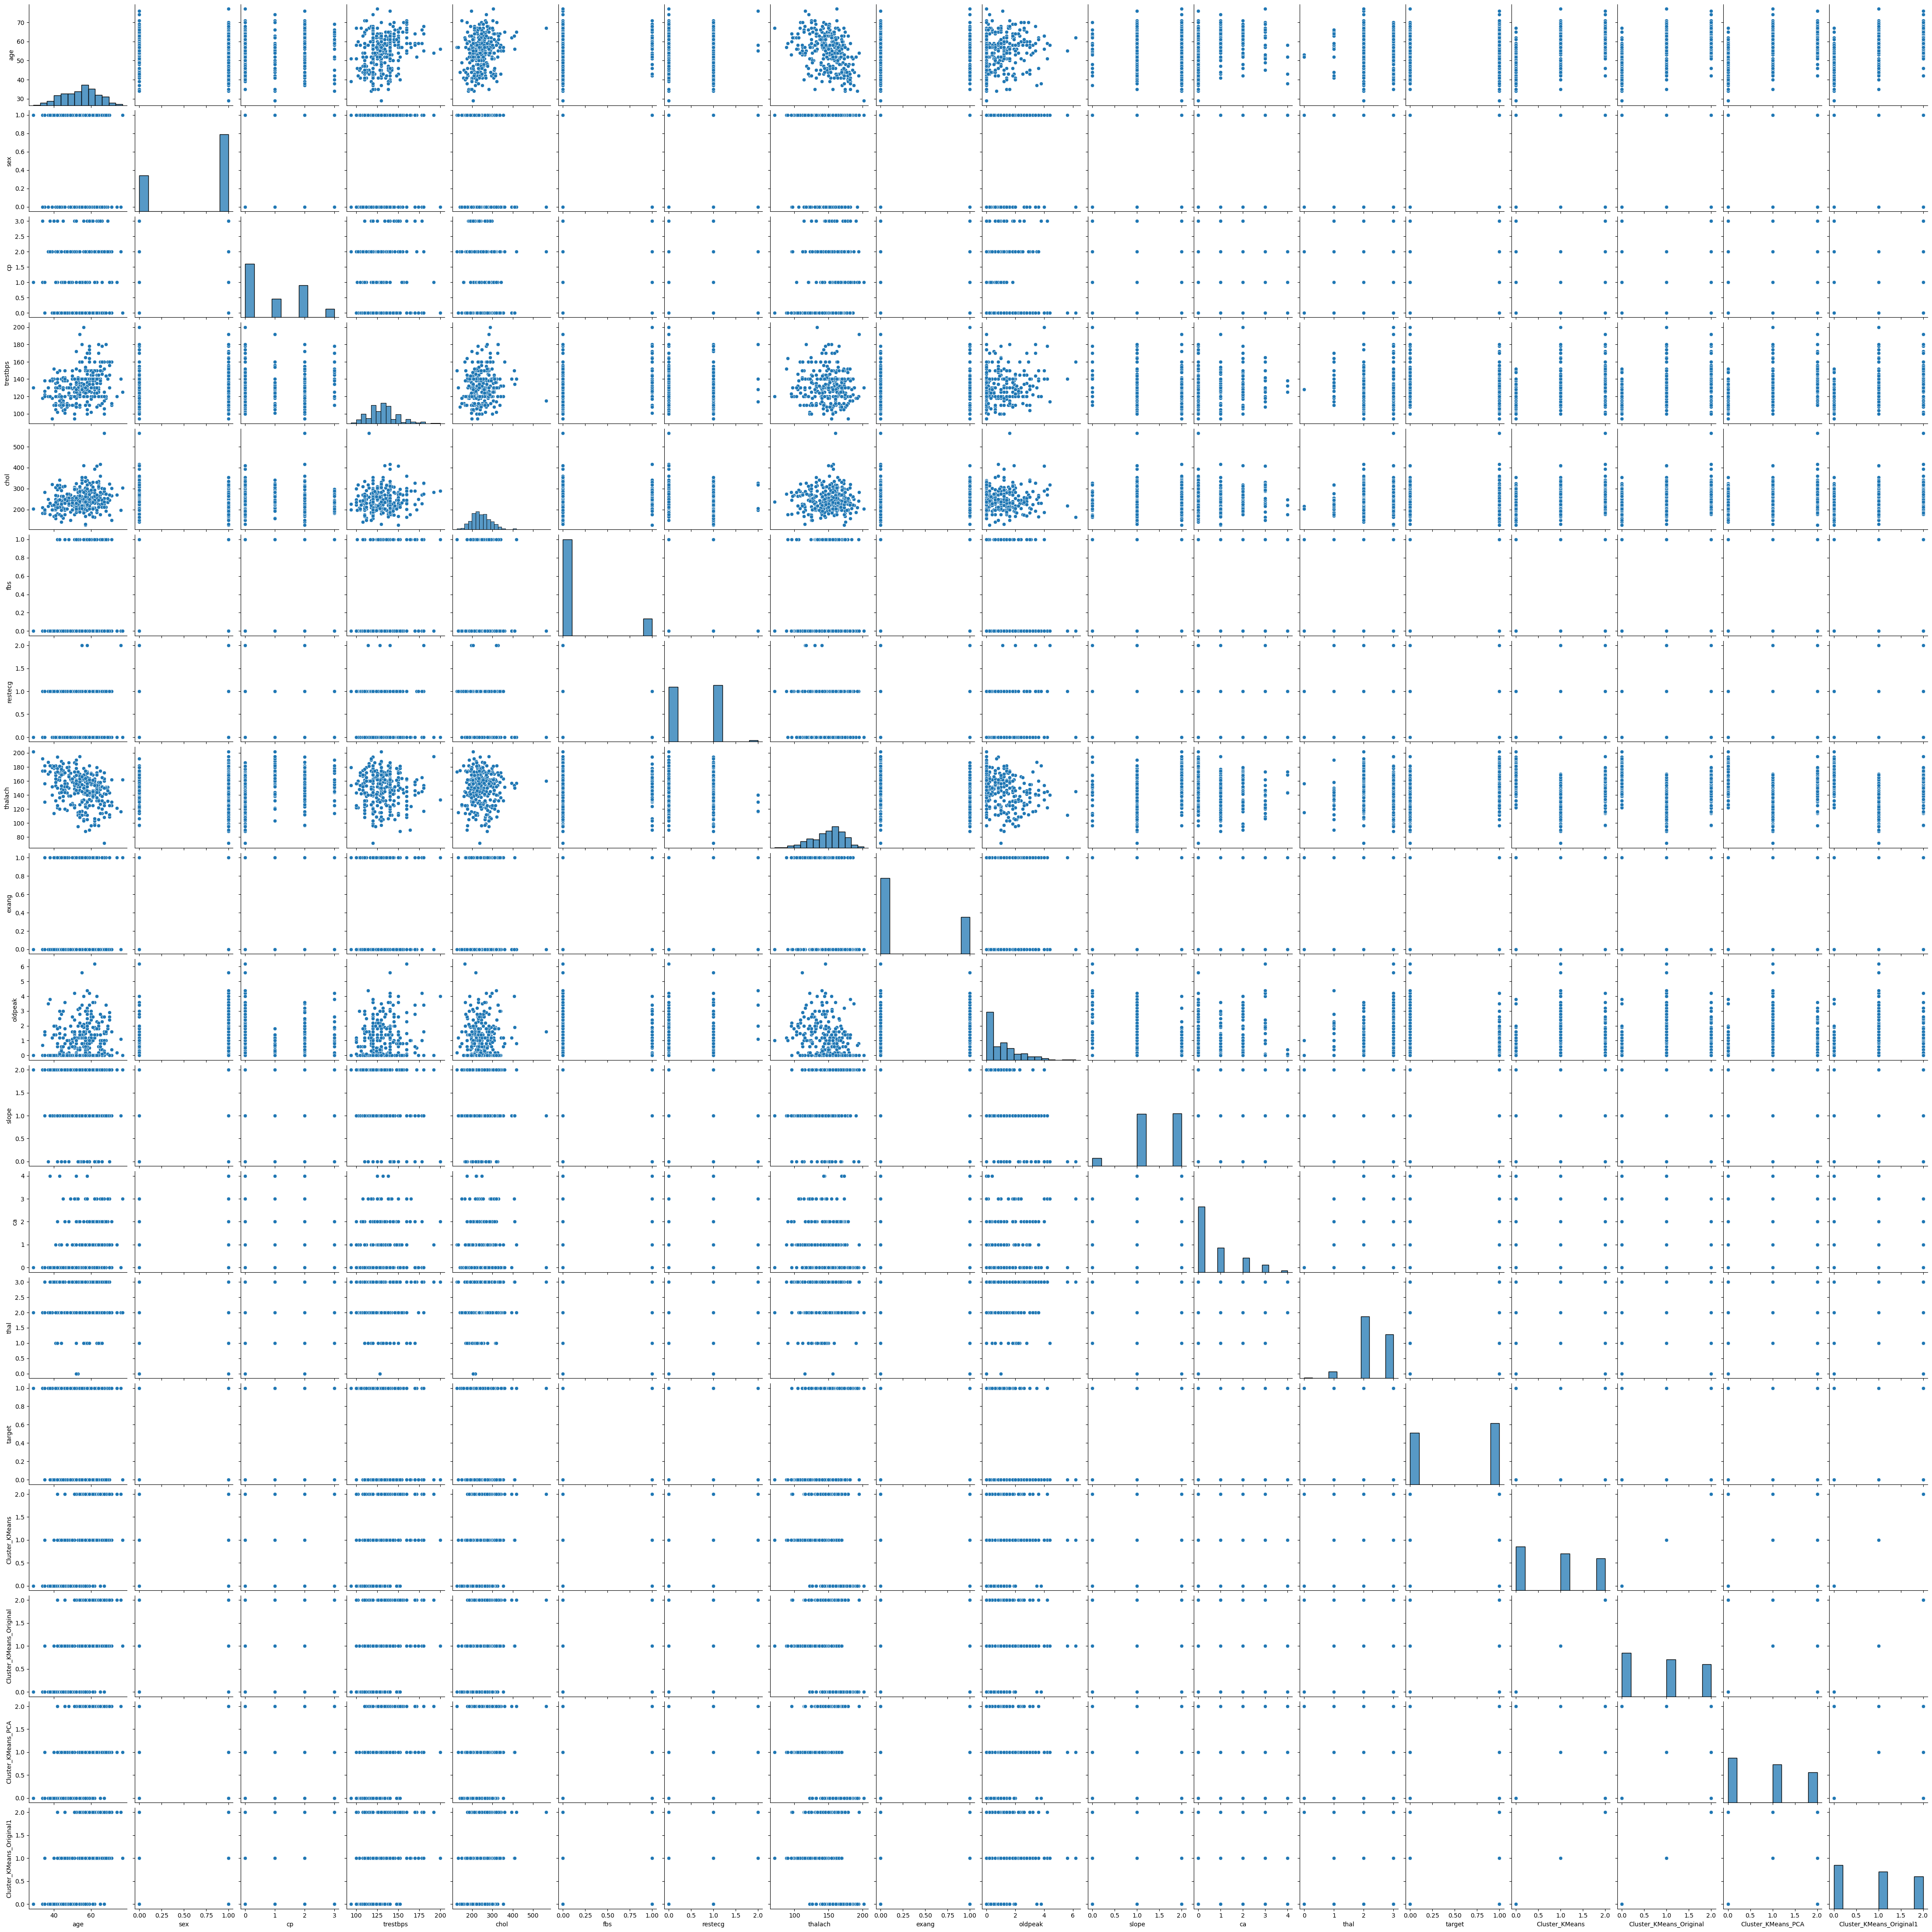

In [60]:
#Bivariate Analysis means  to find relationships between features

sns.pairplot(data)
plt.show()

# Step5: Applying Hierarchical Clustering Before PCA

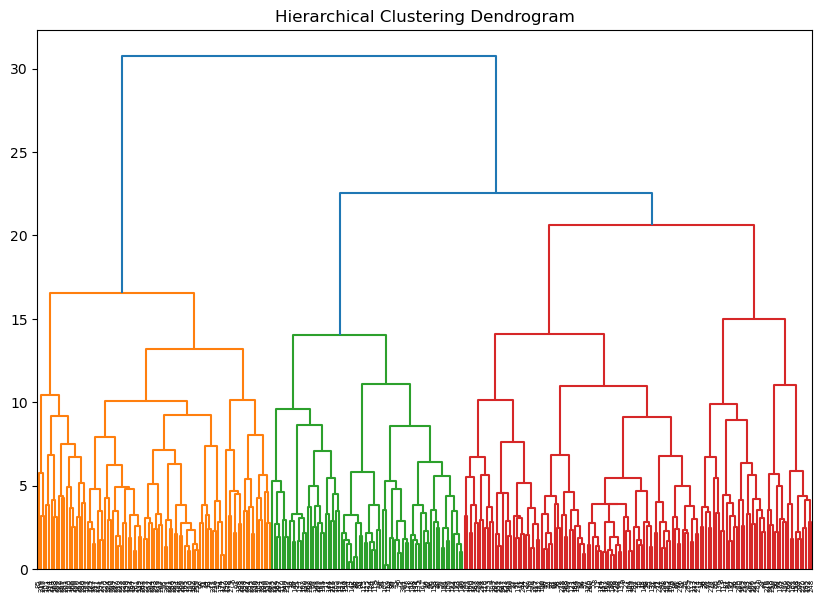

In [44]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [46]:
# 5.2 K-Means Clustering (using the Elbow method)
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

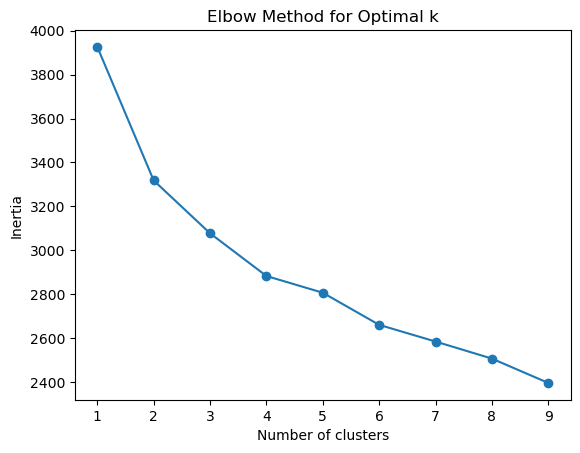

In [47]:
# Elbow plot to determine the optimal number of clusters
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
# K-Means Clustering with k=3 
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans_Original1'] = kmeans.fit_predict(scaled_data)
data['Cluster_KMeans_Original1']

0      2
1      0
2      0
3      0
4      0
      ..
298    1
299    0
300    1
301    1
302    2
Name: Cluster_KMeans_Original1, Length: 302, dtype: int32

# Step 6: PCA (Principal Component Analysis)

In [40]:
# Apply PCA to reduce the dimensionality to 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Step 7:Hierarchical and K-Means Clustering(After PCA)

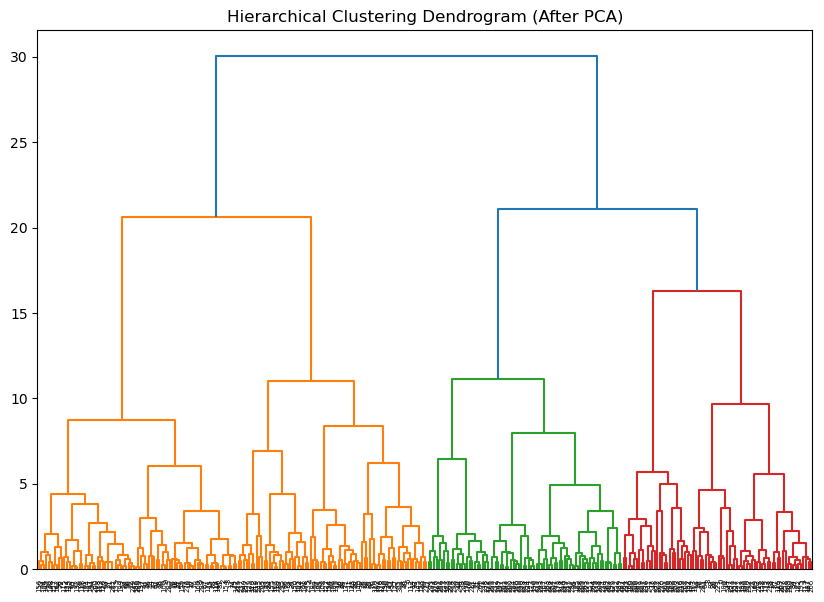

In [50]:
linked_pca = linkage(pca_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked_pca)
plt.title('Hierarchical Clustering Dendrogram (After PCA)')
plt.show()


In [51]:
# 5.2 K-Means Clustering on PCA-transformed data
inertia_pca = []
for k in range(1, 10):
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_data)
    inertia_pca.append(kmeans_pca.inertia_)



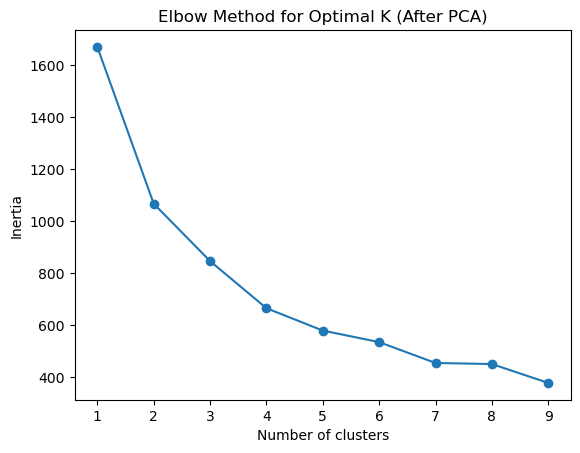

In [52]:
# Elbow plot for K-Means on PCA-transformed data
plt.plot(range(1, 10), inertia_pca, marker='o')
plt.title('Elbow Method for Optimal K (After PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [53]:
# K-Means Clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans_PCA'] = kmeans_pca.fit_predict(pca_data)


Applying K-Means clustering on PCA-transformed healthcare data will help identify distinct patient groups based on key health indicators, improving clustering efficiency by reducing dimensionality and noise. The results may uncover patterns related to disease risk or treatment outcomes, though interpretation may be challenging due to the abstract nature of the principal components

In [54]:
# Step 6: Compare Results
from sklearn.metrics import silhouette_score
# Silhouette Score for original K-Means clusters
silhouette_before = silhouette_score(scaled_data, data['Cluster_KMeans_Original'])
print(f'Silhouette Score (Before PCA): {silhouette_before}')

# Silhouette Score for PCA-based K-Means clusters
silhouette_after = silhouette_score(pca_data, data['Cluster_KMeans_PCA'])
print(f'Silhouette Score (After PCA): {silhouette_after}')


Silhouette Score (Before PCA): 0.11759447127943529
Silhouette Score (After PCA): 0.2933519795763139


Conclusion on Silhouette Scores


Before PCA: Silhouette Score was 0.1176, indicating poor clustering.
After PCA: Silhouette Score improved to 0.2934, suggesting better-defined clusters.


Overall: PCA enhanced clustering quality by increasing separation between clusters.

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(data['Cluster_KMeans_Original'],data['Cluster_KMeans_Original1'])

1.0

In [59]:
#Hence it is proved After PCA, if the accuracy score remains 1.0, 
#it suggests that PCA effectively preserved these cluster assignments 
#while enhancing interpretability and reducing dimensionality

In [1]:
# Step 10: Conclusion & Benefits
# The benefit of using PCA is that it reduces the dimensionality of the dataset,
# making clustering faster and potentially more efficient, without losing much variance.
# This solution can help healthcare professionals understand different patterns in heart disease 
# based on patient features and risk factors.